In [24]:
import pandas  as pd 
import numpy as np 
import sklearn 
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [27]:
data = pd.read_csv("student_mat_2173a47420.csv",sep=";")

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Trimming our data to remove irrelevant attributes 

In [28]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


SEPARATING OUR DATA
label = attribute we are trying to predict i,e G3
features = attributes that will determine our label i.e G1,G2,studytime,failures,absences


In [29]:
predict = "G3"
x = np.array(data.drop([predict],1))#features
y = np.array(data[predict]) #Labels

/tmp/ipykernel_7703/3387364790.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict],1))#features


splittig data into testing and Training

In [31]:
best = 0
for _ in range(20):
    x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train,y_train)
    acc = linear.score(x_test,y_test)
    if acc>best:
        best = acc
        with open("studentgrades.pickle","wb") as f:
            pickle.dump(linear,f)
            
pickle_in = open("studentgrades.pickle","rb")
linear =pickle.load(pickle_in)
    

score

In [35]:
acc = linear.score(x_test,y_test)
acc

0.8624524711969281

viewing the constants

In [32]:
linear.coef_
# linear.intercept_

array([ 0.15671549,  0.98606966, -0.21283123, -0.28672496,  0.0381433 ])

In [33]:
linear.intercept_

-1.563658335886407

predicting specific students

In [34]:
prediction = linear.predict(x_test)

for x in range(len(prediction)):
    print(prediction[x],x_test[x],y_test[x])

15.152456464907642 [15 15  2  0  0] 15
12.08950542886068 [12 12  1  0  4] 13
5.306715873104295 [8 7 2 3 0] 0
14.471533176085993 [15 14  2  0  8] 14
5.133092709004331 [ 6  6  2  2 22] 4
15.533889428296986 [15 15  2  0 10] 15
19.422357302279522 [18 18  1  1 24] 18
8.510090530122463 [ 8  8  1  0 30] 8
12.866886163132387 [13 13  2  0  0] 12
5.85345976645212 [6 7 2 0 0] 0
10.72245177439733 [13 11  2  1  3] 11
6.757012637811885 [ 7  7  1  0 14] 5
10.5008869626805 [10 11  2  0  2] 11
10.086966748231388 [10 10  2  0 17] 10
-0.89231235892526 [7 0 2 0 0] 0
12.860994416387301 [11 13  1  1 10] 13
-0.8950160507841528 [12  0  3  2  0] 0
7.022950941363142 [9 8 2 1 0] 0
10.657602454035002 [11 11  2  0  2] 11
12.762144105684802 [10 13  1  0  4] 14
8.524605337615482 [9 9 2 0 6] 10
11.155553195937875 [ 9 12  3  0  3] 11
8.968384236406 [ 7 10  2  0  0] 11
9.27767291311624 [ 8 10  2  0  4] 9
11.310070278086934 [ 8 12  1  0  0] 12
19.450507791293525 [19 19  4  0  4] 20
9.347729310298615 [ 9  9  1  0 22] 9
1

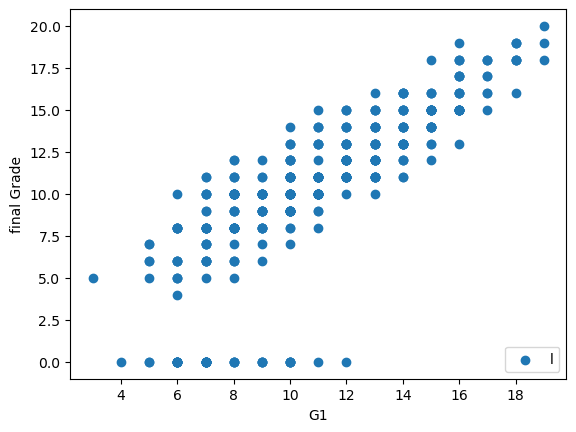

In [37]:
import matplotlib.pyplot as plt
from matplotlib import style
plot = "G1"
plt.scatter(data[plot],data["G3"])
plt.legend("linearplot",loc = 4)
plt.xlabel(plot)
plt.ylabel("final Grade")
plt.show()